<a href="https://colab.research.google.com/github/JJPhoenix/modeloBanco2023/blob/main/ML_Lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Starting with Colaboratory

## ● Needed libraries

### Numpy

In [ ]:
import numpy as np
# In summary this library has a powerful N-dimensional array object.

### Pandas

In [ ]:
import pandas as pd
# Easy-to-use data structures and data analysis tools

### Matplotlib

In [ ]:
# 2D plotting library
# This line tells the notebook to show plots inside of the notebook
%matplotlib inline

import matplotlib.pyplot as plt

### Seaborn

In [ ]:
# Visualization library based on matplotlib. It provides a high-level interface for drawing attractive statistical graphics.
# Michael Waskom - Standford OP.
import seaborn as sb

## ● Let's code

## [TitanicDataset](https://www.kaggle.com/c/titanic/data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls

drive  sample_data


In [ ]:
# Let's try to read from a csv and see how our data looks
titanic_data = pd.read_csv('titanic-data.csv')

##### titanic_data is now a [DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html "Go to the DataFrame documentation!") powered by Pandas, so now we can do whatever we want with this object.

In [ ]:
titanic_data.shape

(891, 12)

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [ ]:
titanic_data["Age"].mean()

29.69911764705882

#### So the moment we access to a column from a DataFrame, the object returned is a [Series](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html#pandas.Series).

In [ ]:
type(titanic_data["Survived"])

pandas.core.series.Series

In [ ]:
titanic_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: >

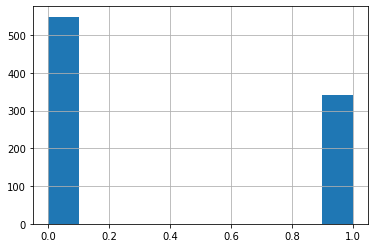

In [ ]:
titanic_data["Survived"].hist()

In [ ]:
titanic_data.loc[titanic_data["Age"].isnull()].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [ ]:
titanic_data.loc[titanic_data["Sex"]=='male'].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S


In [ ]:
len(titanic_data.loc[(titanic_data["Sex"]=='male') & (titanic_data["Survived"]==1)])

109

# Assignment

### ● Cuántas personas de la clase 1 no sobrevivieron?

In [ ]:
len(titanic_data.loc[(titanic_data["Pclass"]==1) & (titanic_data["Survived"]==0)])

80

### ● En qué propiedades encontraste valores perdidos? podrías deshacerte de ellos?

Considerando que valores perdidos son valores.

In [ ]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Para temas de limpieza de datos se podría usar la función dropna(), la cual elimina toda la fila si al menos una de sus elementos son nulos. La principal desventaja de este método es que se puede eliminar datos importantes. Otro método es el reemplazo de los valores nulos por un dato específico, pero podría generar datos arbitrarios.

In [ ]:
titanic_data.dropna().isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

### ● Muestre si al menos un infante de Queenstown sobrevivió? y de los otros puertos de embarcación, existen infantes sobrevivientes?

Teniendo en cuenta que los infantes son personas con una edad menor igual a 2 años. Para la procedencia de los pasajeros se tomó en cuenta la cabecera "Embarked" que tiene valores de (C = Cherbourg; Q = Queenstown; S = Southampton). Se obtiene la información sobre la procedencia de los pasajeros de http://campus.lakeforest.edu/frank/FILES/MLFfiles/Bio150/Titanic/TitanicMETA.pdf

In [ ]:
len(titanic_data.loc[(titanic_data["Age"]<=2) & (titanic_data["Survived"]==1) & (titanic_data["Embarked"]=='Q')].head())

0

Cantidad de infantes de otros puertos que sobrevivieron.

In [ ]:
titanic_data.loc[(titanic_data["Age"]<=2) & (titanic_data["Survived"]==1) & (titanic_data["Embarked"]!='Q')]["Embarked"].value_counts()

S    10
C     5
Name: Embarked, dtype: int64

### ● Cuántas mujeres mayores de 20 años sobrevivieron?

In [ ]:
len(titanic_data.loc[(titanic_data["Age"]>20) & (titanic_data["Survived"]==1)] &  (titanic_data["Sex"]=='female'))

NameError: ignored

### ● Sorprendanos!!